In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#files with data for analysis
# school_data = "raw_data/SAT_Scores_2018/cleaner_data_SAT.csv"
# School_Location = "raw_data/SAT_Scores_2018/free_reduced_lunch1718.csv"

school_data = "cleaner_data_SAT.csv"
School_Location = "free_reduced_lunch1718.csv"


In [3]:
schools = pd.read_csv(school_data)
schools_type = pd.read_csv(School_Location)

In [4]:
schools.head(5)

,School Dist Code,School Dist Name,Test Component,State Avg Score,Dist Avg Score,Test Score Bracket
0,601,Appling County,Combined Test Score,1052,1020.0,Average
1,602,Atkinson County,Combined Test Score,1052,994.0,Average
2,603,Bacon County,Combined Test Score,1052,972.0,Below Average
3,604,Baker County,Combined Test Score,1052,900.0,Below Average
4,605,Baldwin County,Combined Test Score,1052,944.0,Below Average


In [5]:

schools_type = schools_type[['State Agency ID [District] 2017-18','Agency Name','Urban-centric Locale [District] 2017-18']]
schools_type
#All_school = pd.merge(schools, students, how="left", on=["school_name", "school_name"])

,State Agency ID [District] 2017-18,Agency Name,Urban-centric Locale [District] 2017-18
0,601,APPLING COUNTY,33-Town: Remote
1,602,ATKINSON COUNTY,43-Rural: Remote
2,761,ATLANTA PUBLIC SCHOOLS,11-City: Large
3,603,BACON COUNTY,41-Rural: Fringe
4,604,BAKER COUNTY,42-Rural: Distant
...,...,...,...
227,755,WHITFIELD COUNTY,41-Rural: Fringe
228,756,WILCOX COUNTY,43-Rural: Remote
229,757,WILKES COUNTY,32-Town: Distant
230,758,WILKINSON COUNTY,42-Rural: Distant


In [6]:
schools_type = schools_type.rename(columns={'State Agency ID [District] 2017-18':'School Dist Code',
                                            'Urban-centric Locale [District] 2017-18':'Urban-centric Local'})
schools_type
#df.rename(columns={"A": "a", "B": "c"})
All_school_type = pd.merge(schools, schools_type, how="left", on='School Dist Code')
All_school_type.head(5)

,School Dist Code,School Dist Name,Test Component,State Avg Score,Dist Avg Score,Test Score Bracket,Agency Name,Urban-centric Local
0,601,Appling County,Combined Test Score,1052,1020.0,Average,APPLING COUNTY,33-Town: Remote
1,602,Atkinson County,Combined Test Score,1052,994.0,Average,ATKINSON COUNTY,43-Rural: Remote
2,603,Bacon County,Combined Test Score,1052,972.0,Below Average,BACON COUNTY,41-Rural: Fringe
3,604,Baker County,Combined Test Score,1052,900.0,Below Average,BAKER COUNTY,42-Rural: Distant
4,605,Baldwin County,Combined Test Score,1052,944.0,Below Average,BALDWIN COUNTY,32-Town: Distant


In [7]:
Urban_centric = set(All_school_type['Urban-centric Local'])
Urban_centric

{'11-City: Large',
 '12-City: Mid-size',
 '13-City: Small',
 '21-Suburb: Large',
 '23-Suburb: Small',
 '31-Town: Fringe',
 '32-Town: Distant',
 '33-Town: Remote',
 '41-Rural: Fringe',
 '42-Rural: Distant',
 '43-Rural: Remote'}

In [8]:
All_school_type.loc[(All_school_type['Urban-centric Local'].str.contains("City")),'Urban-centric Local']='City'
All_school_type.loc[(All_school_type['Urban-centric Local'].str.contains("Suburb")),'Urban-centric Local']='Suburb'
All_school_type.loc[(All_school_type['Urban-centric Local'].str.contains("Town")),'Urban-centric Local']='Town'
All_school_type.loc[(All_school_type['Urban-centric Local'].str.contains("Rural")),'Urban-centric Local']='Rural'
#df.loc[(df.Event == 'Dance'),'Event']='Hip-Hop'
#df[df["A"].str.contains("Hello|Britain")]
All_school_type

,School Dist Code,School Dist Name,Test Component,State Avg Score,Dist Avg Score,Test Score Bracket,Agency Name,Urban-centric Local
0,601,Appling County,Combined Test Score,1052,1020.0,Average,APPLING COUNTY,Town
1,602,Atkinson County,Combined Test Score,1052,994.0,Average,ATKINSON COUNTY,Rural
2,603,Bacon County,Combined Test Score,1052,972.0,Below Average,BACON COUNTY,Rural
3,604,Baker County,Combined Test Score,1052,900.0,Below Average,BAKER COUNTY,Rural
4,605,Baldwin County,Combined Test Score,1052,944.0,Below Average,BALDWIN COUNTY,Town
...,...,...,...,...,...,...,...,...
419,786,Social Circle City,Combined Test Score,1052,1050.0,Average,SOCIAL CIRCLE CITY,Town
420,789,Thomasville City,Combined Test Score,1052,1095.0,Average,THOMASVILLE CITY,Town
421,791,Trion City,Combined Test Score,1052,1080.0,Average,TRION CITY,Town
422,792,Valdosta City,Combined Test Score,1052,982.0,Below Average,VALDOSTA CITY,City


In [9]:
#school_type_group = All_school_type.groupby(['Test Score Bracket', 'Urban-centric Local'])['Dist Avg Score'].count()
#school_type_group = All_school_type.groupby(['Urban-centric Local']).count()#['Test Score Bracket'].count()
#school_type_group

town_df = All_school_type.loc[All_school_type["Urban-centric Local"] == "Town", :]
town_df

,School Dist Code,School Dist Name,Test Component,State Avg Score,Dist Avg Score,Test Score Bracket,Agency Name,Urban-centric Local
0,601,Appling County,Combined Test Score,1052,1020.0,Average,APPLING COUNTY,Town
4,605,Baldwin County,Combined Test Score,1052,944.0,Below Average,BALDWIN COUNTY,Town
11,609,Ben Hill County,Combined Test Score,1052,960.0,Below Average,BEN HILL COUNTY,Town
28,617,Burke County,Combined Test Score,1052,973.0,Below Average,BURKE COUNTY,Town
31,620,Camden County,Combined Test Score,1052,1087.0,Average,CAMDEN COUNTY,Town
32,621,Candler County,Combined Test Score,1052,1033.0,Average,CANDLER COUNTY,Town
112,641,Dade County,Combined Test Score,1052,1080.0,Average,DADE COUNTY,Town
114,643,Decatur County,Combined Test Score,1052,973.0,Below Average,DECATUR COUNTY,Town
139,645,Dodge County,Combined Test Score,1052,1044.0,Average,DODGE COUNTY,Town
150,649,Early County,Combined Test Score,1052,940.0,Below Average,EARLY COUNTY,Town


In [10]:
town_gp = town_df.groupby(["Test Score Bracket"])["School Dist Code"].count()
town_ls = town_gp.to_list()
town_ls

[1, 27, 17]

In [11]:
aa_df = All_school_type.loc[All_school_type["Test Score Bracket"] == "Above Average", :]

aa_df = aa_df.groupby(["Urban-centric Local"])["School Dist Code"].count()
aa_df

Urban-centric Local
Rural      4
Suburb    25
Town       1
Name: School Dist Code, dtype: int64

In [12]:
av_df = All_school_type.loc[All_school_type["Test Score Bracket"] == "Average", :]

av_df = av_df.groupby(["Urban-centric Local"])["School Dist Code"].count()
av_df

Urban-centric Local
City       23
Rural     104
Suburb    113
Town       27
Name: School Dist Code, dtype: int64

In [13]:
ba_df = All_school_type.loc[All_school_type["Test Score Bracket"] == "Below Average", :]

ba_df = ba_df.groupby(["Urban-centric Local"])["School Dist Code"].count()
ba_df

Urban-centric Local
City      53
Rural     40
Suburb    17
Town      17
Name: School Dist Code, dtype: int64

In [14]:
#school_type_group = pd.DataFrame(school_type_group)
#school_type_group

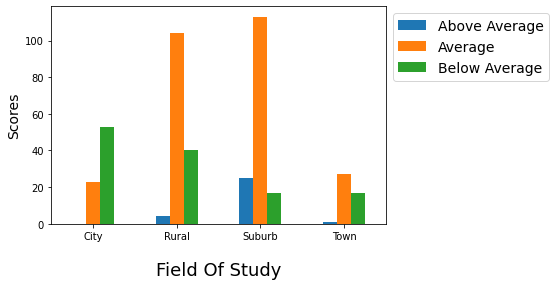

In [15]:
# lista1 = school_type_group.index.tolist()
# print(lista1)


#Type_AA = Index[:][2] #Type_AA = school_type_group['Above Average']
#print(Type_AA)
# Type_Aveg = school_type_group['Average']
# Type_BA = school_type_group['Below Average']
#Index = school_type_group.index.tolist()
#print(Index[0][1])
#print(Index)
# #y_label

# city = [0, 23, 53]
# rural = rural_ls
# sub = sub_ls
# town = town_ls

aa_val = aa_df
av_val = av_df
ba_val = ba_df

index = set(All_school_type['Urban-centric Local'])
#index
bar_df = pd.DataFrame({"Above Average": aa_val,
                       "Average": av_val,
                       "Below Average": ba_val},
                       index = index)
#bar_df
ind = np.arange(len(bar_df.index))
bar_df.plot(kind='bar')
plt.xticks(ind, index, rotation='horizontal')
plt.xlabel('Field Of Study', labelpad=20, fontsize='18')
plt.ylabel('Scores',fontsize='14')
plt.legend(bbox_to_anchor=(1,1), fontsize='14')
plt.show()
# #Type_AA = [0.1, 17.5, 40, 48, 52, 69, 88]
# #>>> Type_Aveg = [2, 8, 70, 1.5, 25, 12, 28]
# #>>> index = ['snail', 'pig', 'elephant',
# #...          'rabbit', 'giraffe', 'coyote', 'horse']
# >>> df = pd.DataFrame({'speed': speed,
# ...                    'lifespan': lifespan}, index=index)
# >>> ax = df.plot.bar(rot=0)
#ax = bar_df.plot.bar(rot=0)

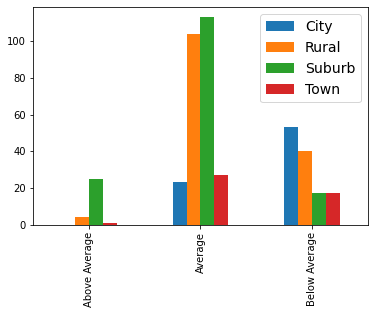

In [16]:
bar_df.T.plot(kind='bar')
plt.legend(bbox_to_anchor=(1,1), fontsize='14')
plt.show()